# Tutorial 1: Part 3

Objectives:
- Building a circular machine: introduce dipoles to the FODO cell.
- Use the matching MAD-X engine compute the require magnet strength for a desired tune. 

**Adding dipoles in the FODO cell**

1. Consider now that the cell of Tutorial 1: Part 2 and add 4 sector dipoles of 15 m (asume 5 m of drift space between the magnets). Consider  ring with 736 dipoles with equal bending angles. Install the four dipoles in the FODO cell.

        Define the dipole parameters:
        BM: dipole, L=??, angle:=??;
    
        Add the dipole in the sequence: 
        dipole1: BM, at=??;


2. Do the dipoles (weak focusing) affect the $\beta_{max}$ and the dispersion? Compute the relative variation on the $\beta_{max}$ on the two planes.

3. From the phase advance of the FODO cell compute the horizontal and vertical tune of the machine?

**From the FODO phase advance to the machine tune**

4. Change the beam to $E_{tot}= 3.5 TeV$. What is the new tune of the machine? Why?

5. Supose you want to set a tune (60.2, 67.2), use the MAD-X matching routine on a single FODO to get it. 
     
        MATCH, SEQUENCE=myCell;
        GLOBAL, Q1=??;//H-tune
        GLOBAL, Q2=??;//V-tune
        VARY, NAME= myKF, STEP=0.00001;
        VARY, NAME= myKD, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;

6. What is the maximum tune that you need to reach with such a lattice? (HINT: what is the maximum phase advance per FODO cell in the thin lense approximation...)

<div>
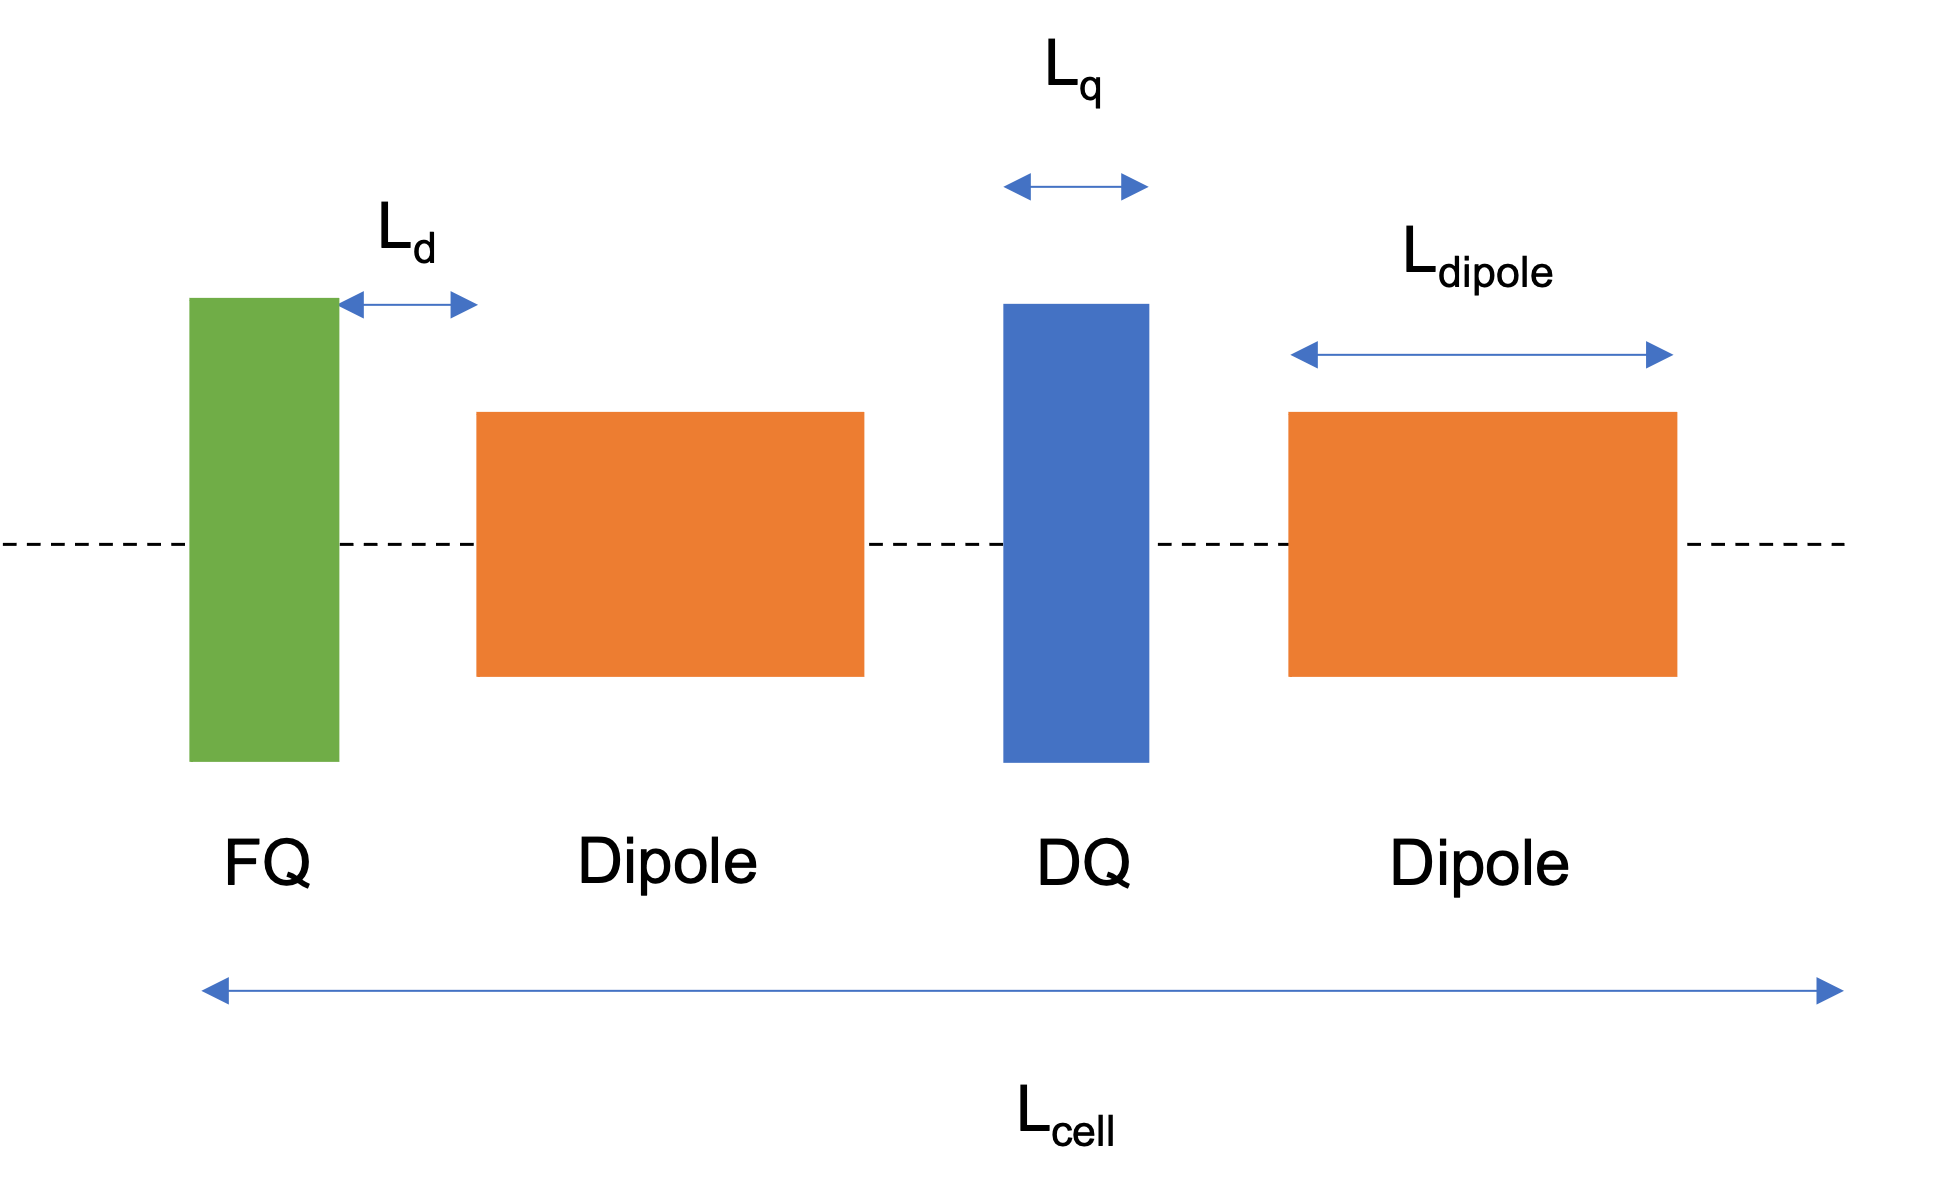
</div>

<div>
<img src="attachment:test.png" width="500"/>
</div>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from cpymad.madx import Madx 

In [2]:
myMad = Madx(stdout=True)

1. Consider now that the cell of Tutorial 1: Part 2 and add 4 sector dipoles of 15 m (asume 5 m of drift space between the magnets). Consider  ring with 736 dipoles with equal bending angles. Install the four dipoles in the FODO cell.

First, the calculation of the required bending angle for a circular orbit:

$2*\pi=N\theta$

In [ ]:
myMad = Madx(stdout=True)
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=?;
dipoleLength=??;
cellLength=??;
nBend=??;

myK=??;// m^-2
myAngle=??;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1=??;
QD: quadrupole, L=quadrupoleLength, K1=??;
BM: sbend, L=??, angle:=??; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=??;
B1: BM, at =??;
B2: BM, at =??;
q2: QD, at=??;
B3: BM, at =??;
B4: BM, at =??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=7000;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
twiss, table=first_twiss, file=Tutorial1_Part3.txt;
plot, table=first_twiss, haxis=s, vaxis=betx,bety,dx,colour=100, file=Tutorial1_part3;
'''
myMad.input(myString);

In [7]:
first_twiss=myMad.table['first_twiss'].dframe()
first_summary=myMad.table['summ'].dframe()

In [ ]:
first_twiss[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

2. Do the dipoles (weak focusing) affect the 𝛽𝑚𝑎𝑥 and the dispersion? Compute the relative variation on the 𝛽𝑚𝑎𝑥 on the two planes.

In [ ]:
myString='''
myAngle=2*pi*0;
twiss, table=second_twiss;
'''
myMad.input(myString);

In [11]:
second_twiss=myMad.table['second_twiss'].dframe()
second_summary=myMad.table['summ'].dframe()

In [ ]:
second_twiss[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

3. From the phase advance of the FODO cell compute the horizontal and vertical tune of the machine?

In [4]:
# Number of FODO cells?


In [3]:
#The machine tunes are therefore


4. Change the beam to $E_{tot}= 3.5 TeV$. What is the new tune of the machine? Why?

In [13]:
myMad = Madx(stdout=True)
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=??;
dipoleLength=??;
cellLength=??;
nBend=??;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

myK=??;// m^-2
myAngle=??;

QF: quadrupole, L=quadrupoleLength, K1=??;
QD: quadrupole, L=quadrupoleLength, K1=??;
BM: sbend, L=dipoleLength, angle:=??; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=??;
B1: BM, at =??;
B2: BM, at =??;
q2: QD, at=??;
B3: BM, at =??;
B4: BM, at =??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=??;!here I am bit  extreme to see an effect on chromaticity

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
twiss;

'''
myMad.input(myString);

In [14]:
third_twiss=myMad.table['twiss'].dframe()
third_summary=myMad.table['summ'].dframe()

In [ ]:
third_twiss[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

In [5]:
# Machine tunes at 7000 GeV

# Tunes and phase

5. Supose you want to set a tune (60.2, 67.2), use the MAD-X matching routine on a single FODO to get it. 
     
        MATCH, SEQUENCE=myCell;
        GLOBAL, Q1=??;//H-tune
        GLOBAL, Q2=??;//V-tune
        VARY, NAME= myKF, STEP=0.00001;
        VARY, NAME= myKD, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;



In [6]:
#Remeber that we have computed the total number of cells in the machine


In [7]:
#Phase advance per cell that we want to mtch to?

In [21]:
myMad = Madx(stdout=True)
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=??;
dipoleLength=??;
cellLength=??;
nBend=??;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

phaseWantedX=??;
phaseWantedY=??;


myKF=??;
myKD=??;


QF: quadrupole, L=quadrupoleLength, K1:=??;
QD: quadrupole, L=quadrupoleLength, K1:=??;
BM: sbend, L=dipoleLength, angle=??; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
 q1: QF, at=??;
 B1: BM, at =??;
 B2: BM, at =??;
 q2: QD, at=??;
 B3: BM, at =??;
 B4: BM, at =??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="BeforeMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="BeforeMatching";

! *********************************************************************
! MATCHING
! *********************************************************************

MATCH, SEQUENCE=myCell;
GLOBAL, Q1=??;//H-tune
GLOBAL, Q2=??;//V-tune
VARY, NAME= myKF, STEP=0.00001;
VARY, NAME= myKD, STEP=0.00001;
LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
ENDMATCH;


! *********************************************************************
! TWISS AFTER MATCHING
! *********************************************************************

twiss, table=aftermatching, file="AfterMatching.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching";

! *********************************************************************
! FINAL TUNE VALUES
! *********************************************************************

value, table(summ,Q1)*(nBend/4);
value, table(summ,Q2)*(nBend/4);

'''
myMad.input(myString);

In [8]:
#Max. tune of the mchine in units of 2pi
